In [6]:
### Import dynamic simulations 
from PathLoader import PathLoader
from DataLink import DataLink 
path_loader = PathLoader('data_config.env', 'current_user.env')
TheLink = DataLink(path_loader, 'data_codes.csv')

### Plot a specific specie in a specifc cell line

In [25]:
dynamic_data = TheLink.get_data_from_code('dynamic_simulation_data_all')

# function to select cellline from dynamic data 

cellline = 'ACH-001113'

specie = 'INSR'


selected_data = dynamic_data[dynamic_data['Cellline'] == cellline]

selected_data.head()

,Cellline,Time,INSR,INSRpY,IRS,IRSi,S6KpT389,PI3K,INSRccIRSccPI3K,PDK1,...,RBp,RBpp,E2FccRB,E2FccRBp,E2FccRBpp,CDK46ccCYCDccP21,CDK46ccCYCDccP27,CDK2ccCYCEccP21,CDK2ccCYCEccP27,CDK2ccCYCEccP27p
0,ACH-001113,1,520.582691,1.025712,14.895045,841.234700,66.310241,452.624757,0.011378,275.679449,...,11.078342,177.432464,1.957924,418.582619,0.004415,281.288640,234.960774,104.382196,2.946210,0.002417
1,ACH-001113,2,520.259338,0.177857,128.244349,726.714189,6.685797,452.619149,0.016986,275.678875,...,2.994683,226.256336,266.893789,113.568781,0.022160,0.002902,506.589547,112.445563,2.126252,0.001744
2,ACH-001113,3,520.268326,0.201012,112.800134,742.190546,7.737442,452.619249,0.016885,275.678885,...,2.621340,268.446041,238.947906,99.821154,0.020620,0.002835,507.099092,117.306612,2.260340,0.001854
3,ACH-001113,4,520.272259,0.210970,107.370995,747.633577,8.180216,452.619266,0.016869,275.678887,...,2.335707,301.003963,217.334658,89.228087,0.019278,0.002778,507.410442,120.914807,2.370465,0.001945
4,ACH-001113,5,520.274104,0.215485,105.232364,749.778568,8.367511,452.619248,0.016887,275.678885,...,2.117821,325.870565,200.851910,81.101948,0.018171,0.002727,507.648593,123.586819,2.462432,0.002020


In [26]:
specie_data = selected_data[specie]
print(specie_data.shape, type(specie_data))
specie_data.head()

(3000,) <class 'pandas.core.series.Series'>


0    520.582691
1    520.259338
2    520.268326
3    520.272259
4    520.274104
Name: INSR, dtype: float64

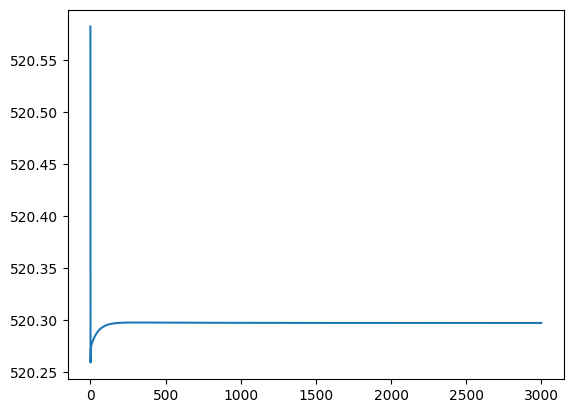

In [27]:
# plot the data

import matplotlib.pyplot as plt

plt.plot(specie_data)
plt.show()

### Plot all cell lines for one specie

In [19]:
# selecting dynamic simulations for one protein specie across all cell lines

specie = 'IRS'

selected_data = dynamic_data[['Cellline', 'Time', specie]]

In [20]:
selected_data.shape

(30000, 3)

In [21]:
selected_data.head()

,Cellline,Time,IRS
0,ACH-001113,1,14.895045
1,ACH-001113,2,128.244349
2,ACH-001113,3,112.800134
3,ACH-001113,4,107.370995
4,ACH-001113,5,105.232364


In [22]:
# transform the data to have time as columns and cell lines as rows

pivoted_data = selected_data.pivot(index='Cellline', columns='Time', values=specie)

In [23]:
pivoted_data.head(10)

Time,1,2,3,4,5,6,7,8,9,10,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000
Cellline,,,,,,,,,,,,,,,,,,,,,
ACH-000233,0.974677,24.660414,21.332900,19.514345,18.427432,17.735683,17.271354,16.943337,16.699434,16.508716,...,13.116113,13.116113,13.116113,13.116113,13.116113,13.116113,13.116114,13.116114,13.116114,13.116114
ACH-000242,97.820953,513.429746,460.586539,443.377889,437.296319,435.001115,434.034270,433.540184,433.216935,432.957454,...,422.387768,422.387769,422.387770,422.387770,422.387771,422.387772,422.387773,422.387774,422.387774,422.387775
ACH-000327,14.417218,117.360416,103.799402,97.380341,94.081087,92.285043,91.250441,90.612425,90.184791,89.870626,...,82.224004,82.224005,82.224005,82.224006,82.224007,82.224007,82.224008,82.224009,82.224009,82.224010
ACH-000461,13.763181,141.929898,125.130040,118.446176,115.483584,114.033620,113.226606,112.700499,112.300938,111.961381,...,100.814859,100.814860,100.814861,100.814862,100.814863,100.814864,100.814865,100.814866,100.814867,100.814868
ACH-000705,52.265796,357.229372,320.502440,309.788466,306.329992,305.072434,304.501854,304.149952,303.870416,303.617354,...,292.658289,292.658290,292.658292,292.658293,292.658295,292.658296,292.658297,292.658299,292.658300,292.658301
ACH-000708,15.904888,119.571542,105.395227,99.345806,96.505442,95.066492,94.269048,93.773082,93.421927,93.142381,...,84.826325,84.826326,84.826327,84.826327,84.826328,84.826328,84.826329,84.826330,84.826330,84.826331
ACH-001113,14.895045,128.244349,112.800134,107.370995,105.232364,104.289759,103.799863,103.485713,103.242195,103.029105,...,95.128335,95.128335,95.128336,95.128337,95.128338,95.128339,95.128340,95.128341,95.128342,95.128343
ACH-001289,6.288528,77.130336,68.097676,64.120892,62.183190,61.152212,60.544158,60.139305,59.834908,59.582221,...,52.331658,52.331659,52.331660,52.331661,52.331662,52.331663,52.331663,52.331664,52.331665,52.331666
ACH-001339,24.235251,368.165555,327.978063,306.265351,293.739338,286.225390,281.596550,278.682914,276.809517,275.575110,...,264.920078,264.920082,264.920086,264.920090,264.920094,264.920098,264.920102,264.920106,264.920110,264.920114


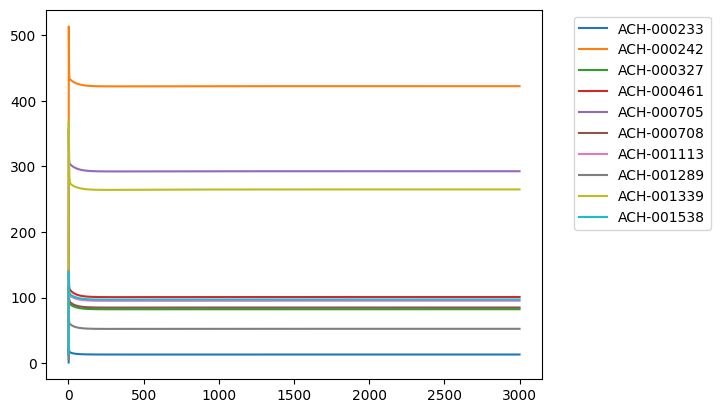

In [33]:
import matplotlib.pyplot as plt

# plot every cell line
for cellline in pivoted_data.index:
    plt.plot(pivoted_data.loc[cellline])
    # label the plot
    
plt.legend(pivoted_data.index, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Select all species for one cell line

In [34]:
cellline = 'ACH-001113'
selected_data = dynamic_data[dynamic_data['Cellline'] == cellline]

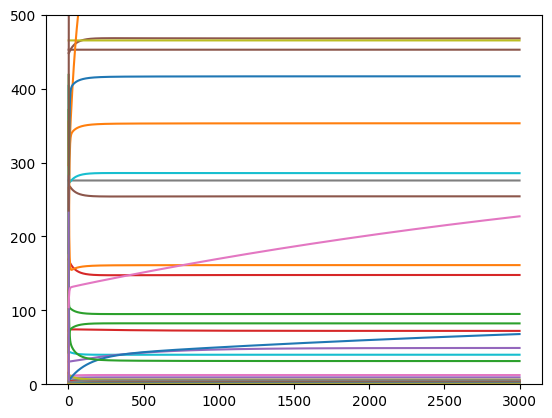

In [40]:
import matplotlib.pyplot as plt

for specie in selected_data.columns[2:]:
    plt.plot(selected_data['Time'], selected_data[specie])
    
# plt.legend(selected_data.columns[2:], bbox_to_anchor=(1.05, 1), loc='upper left')

# show within y range of 0 to x, a visually useful range
plt.ylim(0,500)
plt.show()

### Calculating Dynamic Simulations

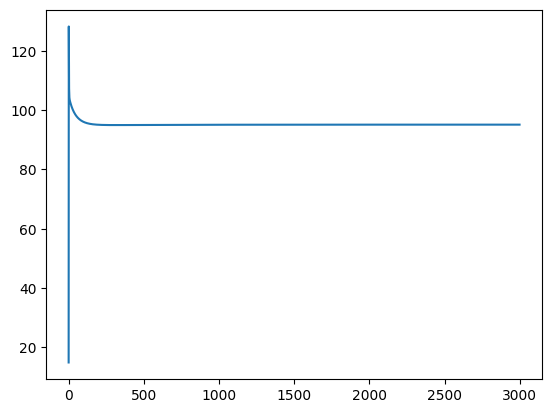

AUC: 285598.3420865625
Max: 128.244348876918
Max time: 1
Min: 14.8950449588058
Min time: 0
Mean: 95.21778459351009
Median: 95.12103435110464
Total Fold Change: 5.386576424577033
Time to stable value: 141


In [56]:
import numpy as np 
import matplotlib.pyplot as plt

## calculating AUC for a specific specie and cell line

specie = 'IRS'
cellline = 'ACH-001113'

selected_data = dynamic_data[dynamic_data['Cellline'] == cellline]
specie_data = selected_data[specie]

# plot the data

plt.plot(specie_data)
plt.show()

# calculate AUC

auc = np.trapz(specie_data, dx=1)

print('AUC:',auc)

# obtain the max value of the specie

max_value = specie_data.max()

print('Max:',max_value)

# obtain the time at which the max value occurs

max_time = specie_data.idxmax()

print('Max time:',max_time)

# obtain the min value of the specie

min_value = specie_data.min()

print('Min:',min_value)

# obtain the time at which the min value occurs

min_time = specie_data.idxmin()

print('Min time:',min_time)

# mean value of the specie

mean_value = specie_data.mean()

print('Mean:',mean_value)

# median value of the specie

median_value = specie_data.median()

print('Median:',median_value)


# total fold change (TFC) from 0 to end 

start = specie_data.iloc[0]
end = specie_data.iloc[-1]

# print('Start:',start)
# print('End:',end)

tfc = (end - start) / start

print('Total Fold Change:',tfc)

# time to stable value (TSV), a time point t where the value of the specie no longer changes more than 0.01 for all t' > t

tsv = specie_data.shape[0]
change_abs_tolerance = 0.01
difference = specie_data.diff()

while tsv > 0:
    if abs(difference.iloc[tsv-1]) < change_abs_tolerance:
        tsv = tsv - 1
    else:
        break

print('Time to stable value:',tsv)


In [57]:
# normalise all time based values and AUC to the maximum simulation time

max_sim_time = specie_data.shape[0]

n_auc = auc / max_sim_time
n_max_time = max_time / max_sim_time
n_min_time = min_time / max_sim_time
n_tsv = tsv / max_sim_time

print('Normalised AUC:',n_auc)
print('Normalised max time:',n_max_time)
print('Normalised min time:',n_min_time)
print('Normalised TSV:',n_tsv)


Normalised AUC: 95.1994473621875
Normalised max time: 0.0003333333333333333
Normalised min time: 0.0
Normalised TSV: 0.047


In [66]:
### iterate through all cell lines and species and calculate all dynamic simulation features, return a dataframe

import numpy as np
import pandas as pd

# function to calculate dynamic simulation features for a specie and cell line

def calculate_dynamic_simulation_features(specie, cellline, dynamic_data, normalise_time_based_values=True):
    selected_data = dynamic_data[dynamic_data['Cellline'] == cellline]
    specie_data = selected_data[specie]
    # reset index to start from 0
    specie_data = specie_data.reset_index(drop=True)
    
    # calculate AUC
    auc = np.trapz(specie_data, dx=1)
    
    # obtain the max value of the specie
    max_value = specie_data.max()
    
    # obtain the time at which the max value occurs
    max_time = specie_data.idxmax()
    
    # obtain the min value of the specie
    min_value = specie_data.min()
    
    # obtain the time at which the min value occurs
    min_time = specie_data.idxmin()
    
    # mean value of the specie
    mean_value = specie_data.mean()
    
    # median value of the specie
    median_value = specie_data.median()
    
    # total fold change (TFC) from 0 to end 
    start = specie_data.iloc[0]
    end = specie_data.iloc[-1]
    tfc = (end - start) / start
    
    # time to stable value (TSV), a time point t where the value of the specie no longer changes more than 0.01 for all t' > t
    tsv = specie_data.shape[0]
    change_abs_tolerance = 0.01
    difference = specie_data.diff()
    while tsv > 0:
        if abs(difference.iloc[tsv-1]) < change_abs_tolerance:
            tsv = tsv - 1
        else:
            break
    
    # normalise all time based values and AUC to the maximum simulation time
    max_sim_time = specie_data.shape[0]
    n_auc = auc / max_sim_time
    n_max_time = max_time / max_sim_time
    n_min_time = min_time / max_sim_time
    n_tsv = tsv / max_sim_time
    
    if normalise_time_based_values:
        return [n_auc, max_value, n_max_time, min_value, n_min_time, mean_value, median_value, tfc, n_tsv]
    
    return [auc, max_value, max_time, min_value, min_time, mean_value, median_value, tfc, tsv]

all_species = dynamic_data.columns[2:]
all_celllines = dynamic_data['Cellline'].unique()

new_dataset = []

for c in all_celllines:
    cellline_dynamic_features = []
    for s in all_species:
        cellline_dynamic_features.extend(calculate_dynamic_simulation_features(s, c, dynamic_data))
    new_dataset.append(cellline_dynamic_features)
    

dynamic_feature_label = ['auc', 'max', 'max_time', 'min', 'min_time', 'mean', 'median', 'tfc', 'tsv']    
new_df = pd.DataFrame(new_dataset, columns=[s + '_' + dynamic_feature for s in all_species for dynamic_feature in dynamic_feature_label], index=all_celllines)
new_df.head()


0 3000
0 3000
1 3000
0 3000
0 3000
0 3000
305 3000
0 3000
305 3000
0 3000
305 3000
0 3000
178 3000
34 3000
2999 3000
6 3000
0 3000
305 3000
1 3000
0 3000
1 3000
1 3000
0 3000
0 3000
1 3000
305 3000
0 3000
1 3000
2999 3000
0 3000
1045 3000
2999 3000
0 3000
2999 3000
2999 3000
0 3000
0 3000
2999 3000
2999 3000
2999 3000
2999 3000
2999 3000
2999 3000
2999 3000
1 3000
1148 3000
0 3000
2999 3000
0 3000
0 3000
2999 3000
1 3000
0 3000
1 3000
0 3000
208 3000
2999 3000
2999 3000
2999 3000
0 3000
0 3000
1 3000
0 3000
0 3000
0 3000
282 3000
0 3000
282 3000
0 3000
282 3000
0 3000
154 3000
34 3000
2999 3000
7 3000
0 3000
283 3000
1 3000
0 3000
1 3000
1 3000
0 3000
0 3000
1 3000
283 3000
0 3000
1 3000
2999 3000
0 3000
1150 3000
2999 3000
0 3000
2999 3000
2999 3000
0 3000
0 3000
2999 3000
2999 3000
2999 3000
2999 3000
2999 3000
2999 3000
2999 3000
1 3000
930 3000
0 3000
2999 3000
0 3000
0 3000
2999 3000
1 3000
0 3000
1 3000
0 3000
198 3000
2999 3000
2999 3000
2999 3000
0 3000
0 3000
1 3000
0 3000
0 3

,INSR_auc,INSR_max,INSR_max_time,INSR_min,INSR_min_time,INSR_mean,INSR_median,INSR_tfc,INSR_tsv,INSRpY_auc,...,CDK2ccCYCEccP27_tsv,CDK2ccCYCEccP27p_auc,CDK2ccCYCEccP27p_max,CDK2ccCYCEccP27p_max_time,CDK2ccCYCEccP27p_min,CDK2ccCYCEccP27p_min_time,CDK2ccCYCEccP27p_mean,CDK2ccCYCEccP27p_median,CDK2ccCYCEccP27p_tfc,CDK2ccCYCEccP27p_tsv
ACH-001113,520.123709,520.582691,0.0,520.259338,0.000333,520.297189,520.297387,-0.000548,0.000667,0.262439,...,0.032333,0.004385,0.004466,0.999667,0.001744,0.000333,0.004386,0.004459,0.847696,0.000333
ACH-001289,482.442083,482.982812,0.0,482.538631,0.000333,482.603014,482.603355,-0.000786,0.001000,0.373775,...,0.035333,0.004571,0.004674,0.999667,0.001222,0.000333,0.004572,0.004663,1.133538,0.000333
ACH-001339,36.593528,36.613628,0.0,36.604823,0.000333,36.605731,36.605730,-0.000216,0.000333,0.003782,...,0.029667,0.005482,0.005541,0.999667,0.003072,0.000333,0.005483,0.005538,0.432180,0.000333
ACH-001538,293.467100,293.729052,0.0,293.543601,0.000333,293.564982,293.565062,-0.000558,0.000667,0.135572,...,0.031000,0.005035,0.005111,0.999667,0.002399,0.000333,0.005037,0.005105,0.584531,0.000333
ACH-000242,860.528009,860.989978,0.0,860.798152,0.000333,860.814976,860.815008,-0.000203,0.000667,0.174109,...,0.029333,0.004205,0.004298,0.999667,0.002036,0.000333,0.004206,0.004295,0.812607,0.000333


## Visualisation of processed dynamic features vs. original features 

In [81]:
dynamic_data = TheLink.get_data_from_code('dynamic_features')
ccle_data = TheLink.get_data_from_code('ccle')

### Automatic Plot Generation 

In [97]:
import matplotlib.pyplot as plt
import os 

match_rules_file = TheLink.get_data_from_code('integrate_ccle_anthony')
match_rules_files_dropna = match_rules_file.dropna(subset=['CCLE reference'])

dynamic_feature_label = ['auc', 'max', 'max_time', 'min', 'min_time', 'mean', 'median', 'tfc', 'tsv']    

folder_name = 'dynamic_features_ccle_plots'

if not os.path.exists(f'{path_loader.get_data_path()}data/results/{folder_name}'):
    os.makedirs(f'{path_loader.get_data_path()}data/results/{folder_name}')

file_save_path = f'{path_loader.get_data_path()}data/results/{folder_name}/'

species_ccle_matches = {}
for i in range(len(match_rules_files_dropna)):
    row = match_rules_files_dropna.iloc[i]  
    specie_name = row['Protein Name']
    ccle_matches = row['CCLE reference']
    ccle_matches = ccle_matches.split(';')
    species_ccle_matches[specie_name] = ccle_matches
    

for s in species_ccle_matches:
    dynamic_specie = s 
    gene_list = species_ccle_matches[s]
    dynamic_features = dynamic_data[[dynamic_specie + '_' + dynamic_feature for dynamic_feature in dynamic_feature_label]]

    # plot all dynamic features against gene expression as a multi-panel plot

    fig, axes = plt.subplots(3, 3, figsize=(15, 15))

    for i, dynamic_feature in enumerate(dynamic_feature_label):
        ax = axes.flatten()[i]
        for gene in gene_list:
            gene_expression = ccle_data[gene]
            ax.scatter(gene_expression, dynamic_features[dynamic_specie + '_' + dynamic_feature], alpha=0.5, s=10)
        ax.legend(gene_list, loc='upper left')
        # change the x and y axis labels size
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.set_xlabel('Gene expression', fontsize=15)
        ax.set_ylabel(dynamic_feature, fontsize=15)

    plt.suptitle(
        f'{dynamic_specie} dynamic features vs gene expression of {gene_list}', fontsize=20)
    plt.tight_layout()
    plt.savefig(f'{file_save_path}{dynamic_specie}_dynamic_features_vs_gene_expression.png')    
    # do not show the plot
    plt.close()



### Visualising One Specie vs two genes

In [89]:
dynamic_specie = 'CDK46'
ccle_gene = 'CDK6'
ccle_gene_2 = 'CDK4'

In [90]:
gene_expression = ccle_data[ccle_gene]
gene_expression_2 = ccle_data[ccle_gene_2]
dynamic_feature_label = ['auc', 'max', 'max_time', 'min', 'min_time', 'mean', 'median', 'tfc', 'tsv']    

# extract dynamic features for a specie
dynamic_features = dynamic_data[[dynamic_specie + '_' + dynamic_feature for dynamic_feature in dynamic_feature_label]]


In [91]:
dynamic_features.head()

,CDK46_auc,CDK46_max,CDK46_max_time,CDK46_min,CDK46_min_time,CDK46_mean,CDK46_median,CDK46_tfc,CDK46_tsv
0,1147.824244,1.425595,1,0.018118,0,0.382673,0.372201,19.523934,21
1,2158.684706,4.940886,1,0.024805,0,0.719681,0.691407,26.834971,54
2,18266.169693,17.381836,2,0.029806,0,6.089728,6.000122,200.310080,110
3,3168.801687,4.163778,1,0.028491,0,1.056444,1.032807,35.233591,47
4,490.804124,0.418105,1,0.014278,0,0.163630,0.159026,10.132196,4


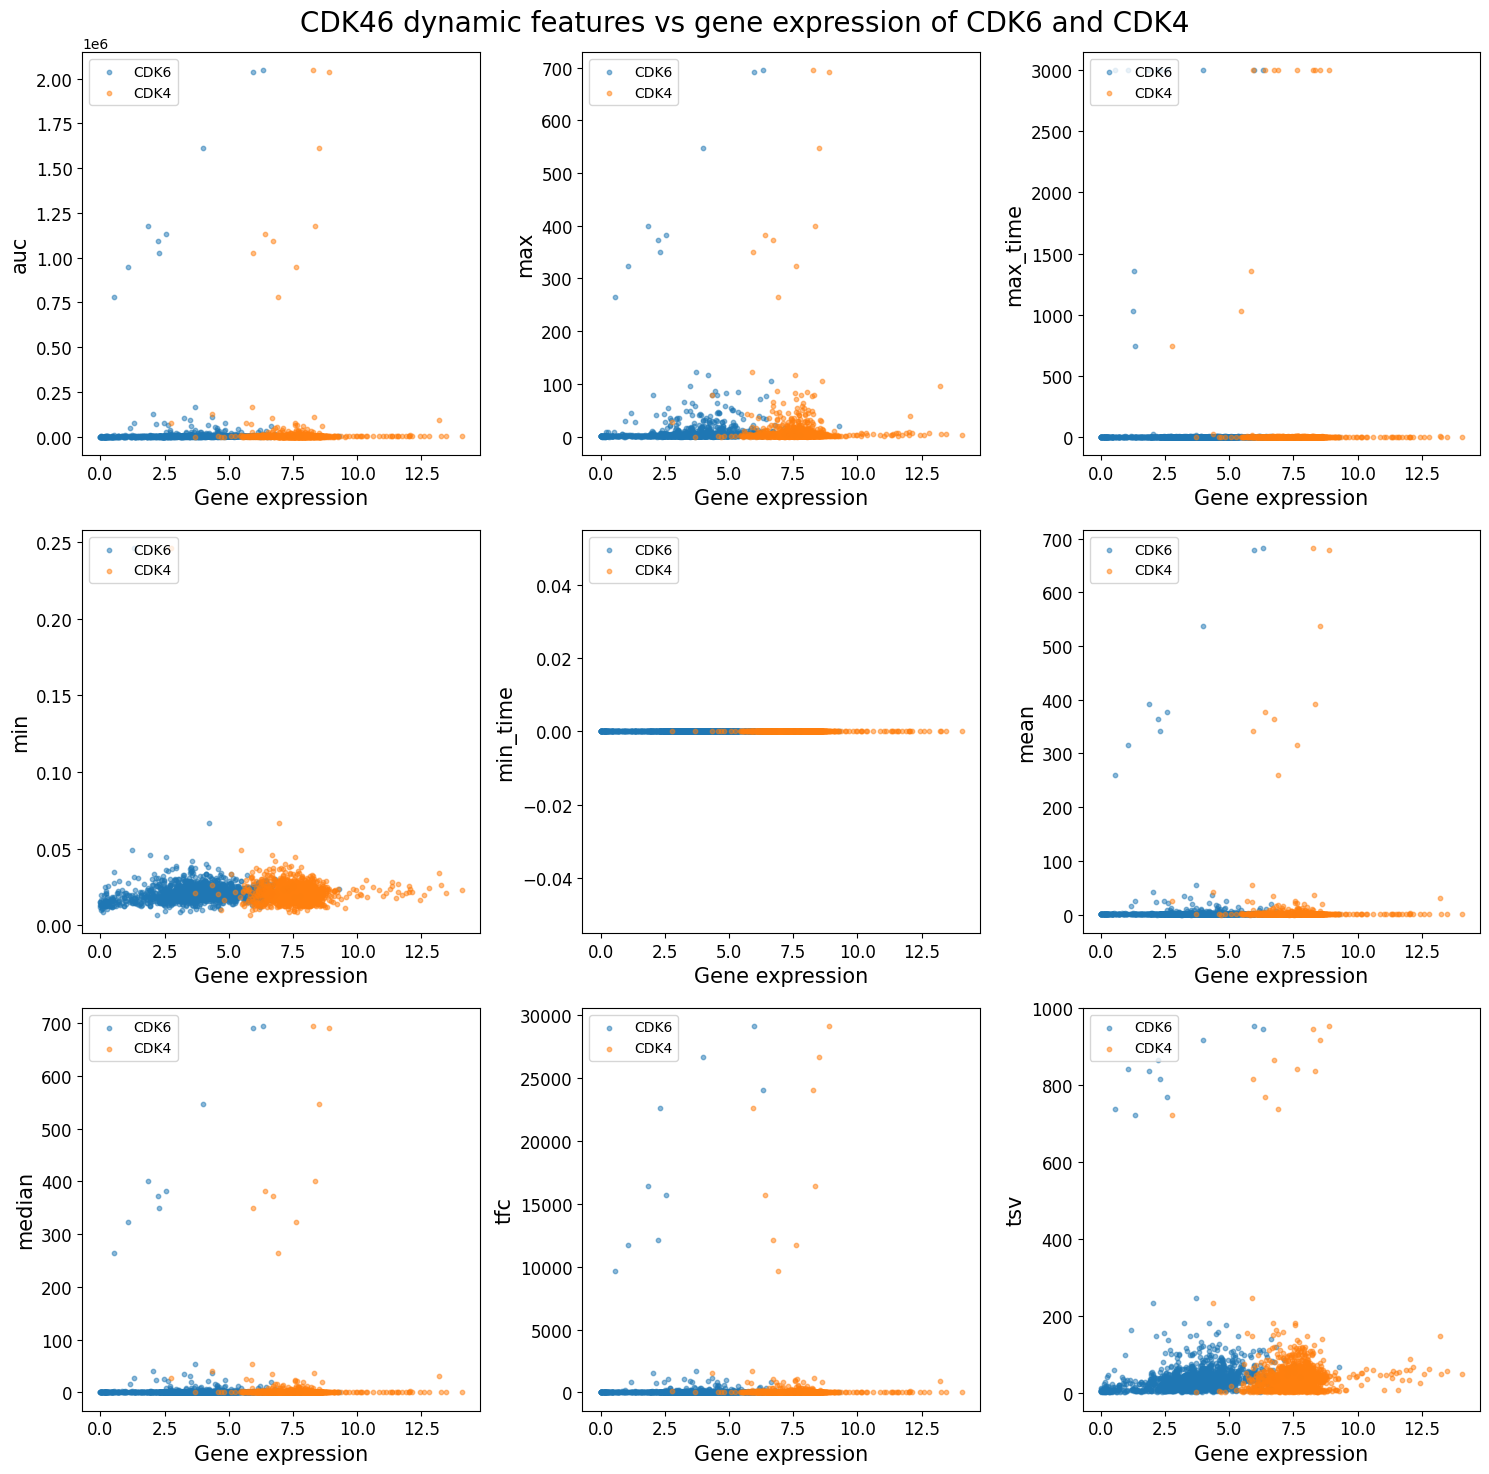

In [92]:
# plot all dynamic features against gene expression as a multi-panel plot

import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(15,15))

for i, dynamic_feature in enumerate(dynamic_feature_label):
    ax = axes.flatten()[i]
    ax.scatter(gene_expression, dynamic_features[dynamic_specie + '_' + dynamic_feature], alpha=0.5, s=10)
    ax.scatter(gene_expression_2, dynamic_features[dynamic_specie + '_' + dynamic_feature], alpha=0.5, s=10)
    ax.legend([ccle_gene, ccle_gene_2], loc='upper left')
    # change the x and y axis labels size
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('Gene expression', fontsize=15)
    ax.set_ylabel(dynamic_feature, fontsize=15)

plt.suptitle(f'{dynamic_specie} dynamic features vs gene expression of {ccle_gene} and {ccle_gene_2}', fontsize=20)
plt.tight_layout()
plt.show()

    


### Visualising One Specie

In [93]:
dynamic_specie = 'CDK46'
ccle_gene = 'CDK6'

In [94]:
gene_expression = ccle_data[ccle_gene]
gene_expression_2 = ccle_data[ccle_gene_2]
dynamic_feature_label = ['auc', 'max', 'max_time', 'min', 'min_time', 'mean', 'median', 'tfc', 'tsv']    

# extract dynamic features for a specie
dynamic_features = dynamic_data[[dynamic_specie + '_' + dynamic_feature for dynamic_feature in dynamic_feature_label]]


In [95]:
dynamic_features.head()

,CDK46_auc,CDK46_max,CDK46_max_time,CDK46_min,CDK46_min_time,CDK46_mean,CDK46_median,CDK46_tfc,CDK46_tsv
0,1147.824244,1.425595,1,0.018118,0,0.382673,0.372201,19.523934,21
1,2158.684706,4.940886,1,0.024805,0,0.719681,0.691407,26.834971,54
2,18266.169693,17.381836,2,0.029806,0,6.089728,6.000122,200.310080,110
3,3168.801687,4.163778,1,0.028491,0,1.056444,1.032807,35.233591,47
4,490.804124,0.418105,1,0.014278,0,0.163630,0.159026,10.132196,4


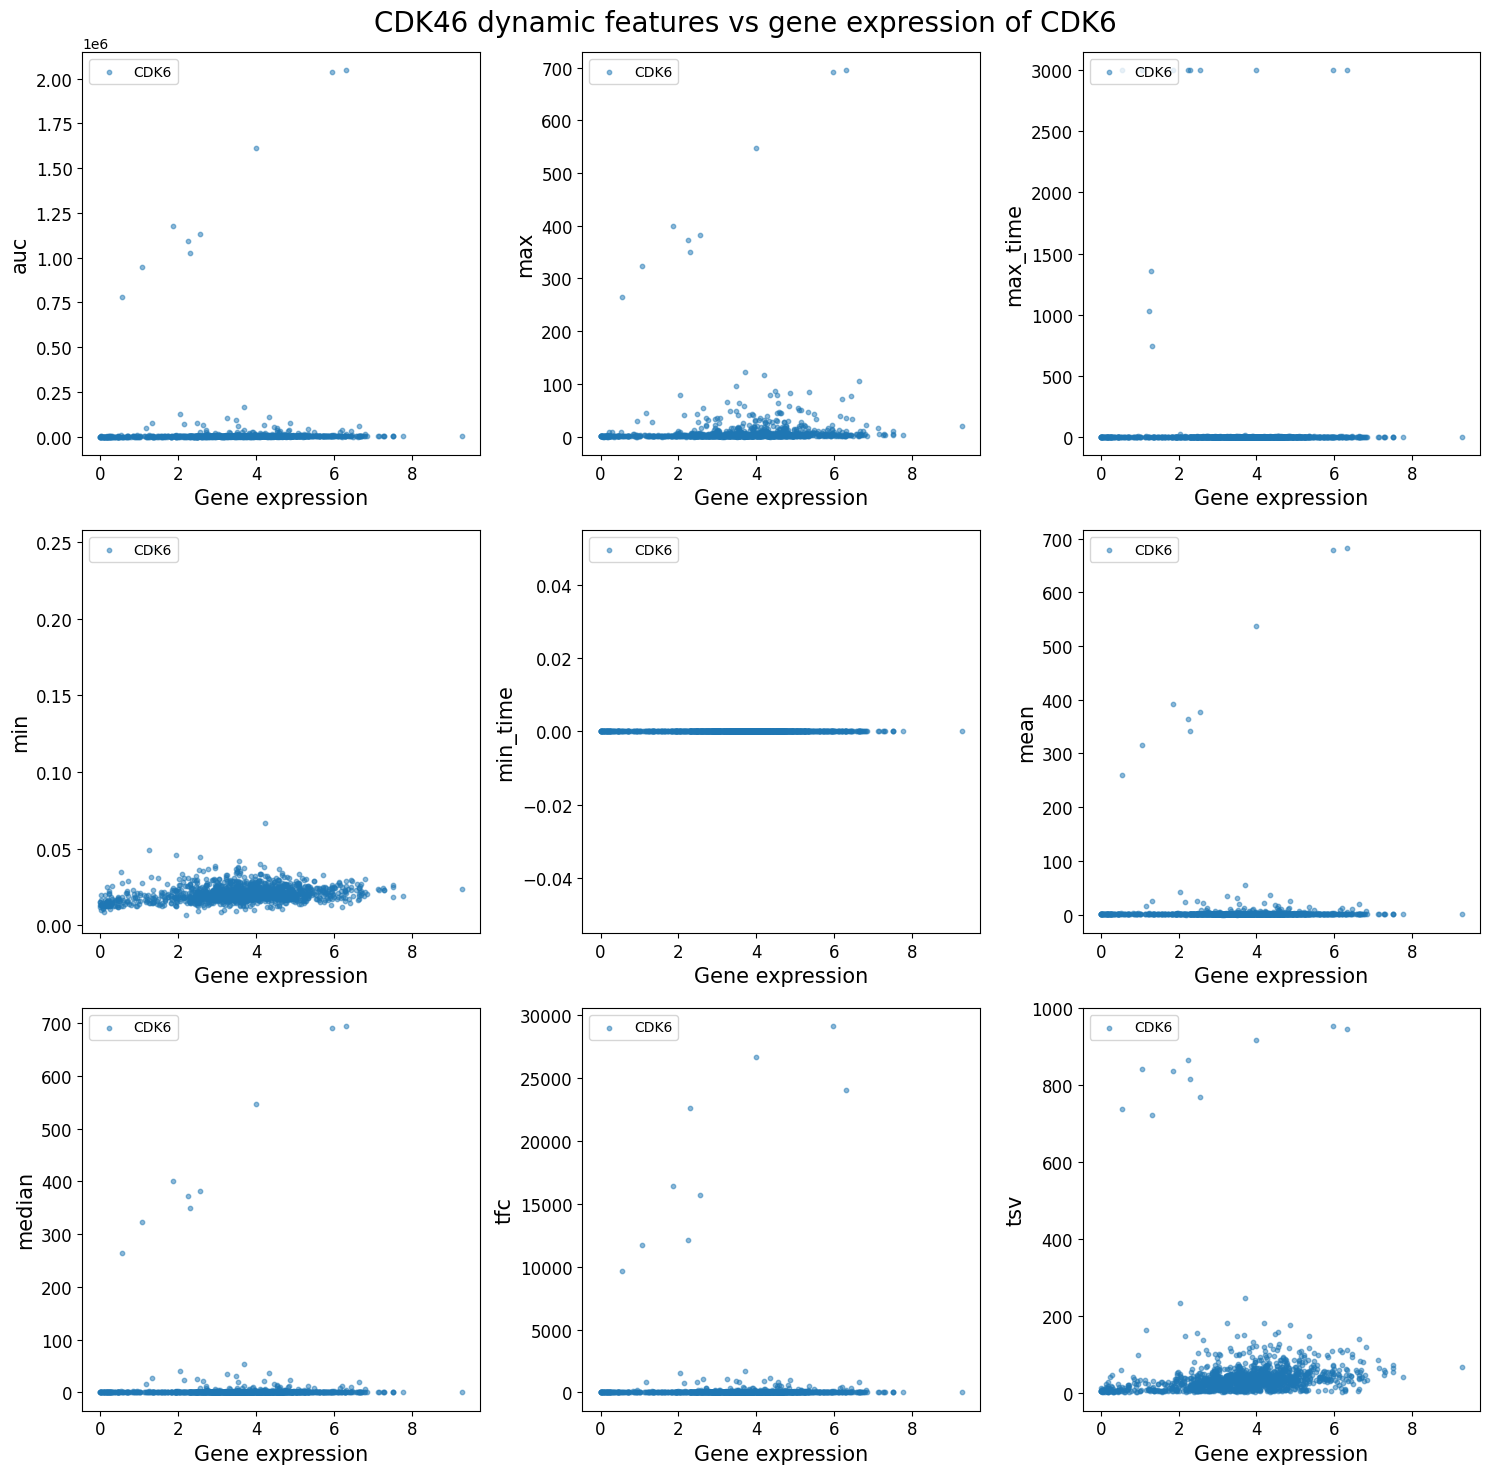

In [96]:
# plot all dynamic features against gene expression as a multi-panel plot

import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(15,15))

for i, dynamic_feature in enumerate(dynamic_feature_label):
    ax = axes.flatten()[i]
    ax.scatter(gene_expression, dynamic_features[dynamic_specie + '_' + dynamic_feature], alpha=0.5, s=10)
    ax.legend([ccle_gene, ccle_gene_2], loc='upper left')
    # change the x and y axis labels size
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('Gene expression', fontsize=15)
    ax.set_ylabel(dynamic_feature, fontsize=15)

plt.suptitle(f'{dynamic_specie} dynamic features vs gene expression of {ccle_gene}', fontsize=20)
plt.tight_layout()
plt.show()

    


## Variance and similarity of dynamic features

against original features from ccle expression